# E-Commerce Order Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
orders = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_orders_dataset.csv')
order_items = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_order_items_dataset.csv')
products = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_products_dataset.csv')
customers = pd.read_csv('/kaggle/input/brazilian-ecommerce/olist_customers_dataset.csv')

# Basic information about the datasets used

In [3]:
print(orders.head(3))
print(order_items.head(3))
print(products.head(3))
print(customers.head(3))

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
                           order_id  order_item_id  \
0  

In [4]:
print(orders.info())
print(order_items.info())
print(products.info())
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  ob

In [5]:
print("Orders: ",orders.shape)
print("Order items: ",order_items.shape)
print("Products: ",products.shape)
print("Customers: ",customers.shape)

Orders:  (99441, 8)
Order items:  (112650, 7)
Products:  (32951, 9)
Customers:  (99441, 5)


In [6]:
print("Orders: ",orders.size)
print("Order items: ",order_items.size)
print("Products: ",products.size)
print("Customers: ",customers.size)

Orders:  795528
Order items:  788550
Products:  296559
Customers:  497205


In [7]:
print("Orders: \n",orders.dtypes)
print("\n\nOrder items: \n",order_items.dtypes)
print("\n\nProducts: \n",products.dtypes)
print("\n\nCustomers: \n",customers.dtypes)

Orders: 
 order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object


Order items: 
 order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object


Products: 
 product_id                     object
product_category_name          object
product_name_lenght           float64
product_description_lenght    float64
product_photos_qty            float64
product_weight_g              float64
product_length_cm             float64
product_height_cm             float64
product_width_cm              float64
dtype: object


Customers: 
 customer_id            

# Peak orders time throughout the day

In [8]:
# Convert 'order_purchase_timestamp' to datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Extract hour from 'order_purchase_timestamp' for time series analysis
orders['Order Hour'] = orders['order_purchase_timestamp'].dt.hour

# Group by hour and count the number of orders
order_times = orders.groupby('Order Hour').size()

# Convert order_times Series to DataFrame for better formatting
peak_order_times = pd.DataFrame(order_times, columns=['Number of Orders'])

# Find and display peak order times
peak_order_times = peak_order_times.sort_values(by='Order Hour', ascending=True)

print("Peak Order Times:")
print(peak_order_times)

Peak Order Times:
            Number of Orders
Order Hour                  
0                       2394
1                       1170
2                        510
3                        272
4                        206
5                        188
6                        502
7                       1231
8                       2967
9                       4785
10                      6177
11                      6578
12                      5995
13                      6518
14                      6569
15                      6454
16                      6675
17                      6150
18                      5769
19                      5982
20                      6193
21                      6217
22                      5816
23                      4123


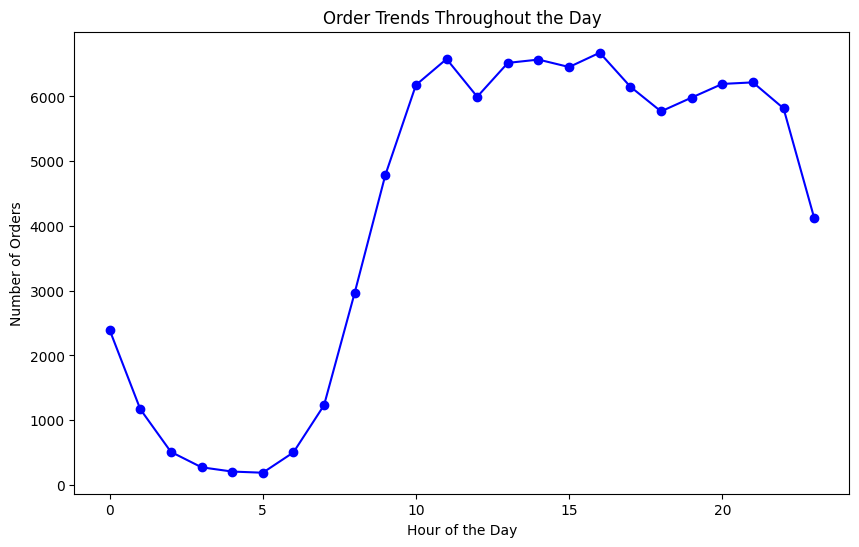

In [9]:
# Plot peak order times
plt.figure(figsize=(10, 6))
order_times.plot(kind='line', marker='o', linestyle='-', color='b', title='Order Trends Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.show()

# Customer Purchasing Patterns

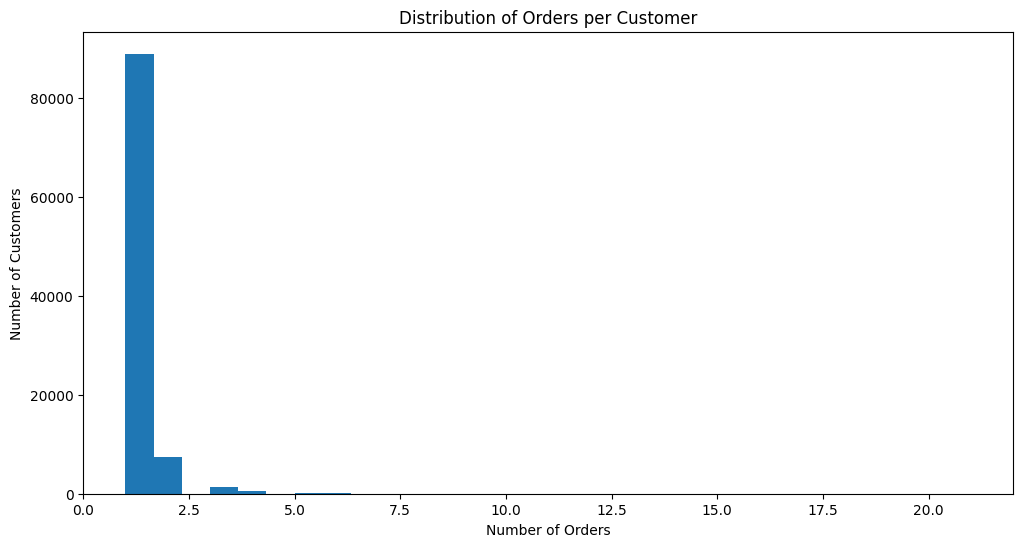

In [10]:
# Merge 'orders' and 'order_items' datasets on 'order_id' to analyze customer purchasing patterns
order_customer_data = pd.merge(order_items, orders, on='order_id')

# Example analysis: Number of orders per customer
customer_order_counts = order_customer_data['customer_id'].value_counts()

# Bar Plot the distribution of orders per customer
plt.figure(figsize=(12, 6))
customer_order_counts.plot(kind='hist', bins=30, title='Distribution of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.show()

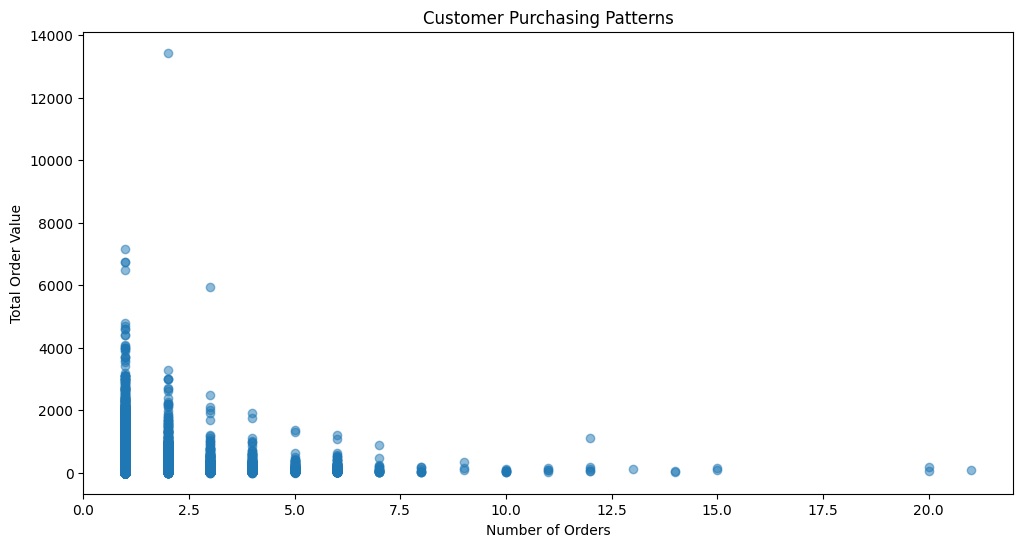

In [11]:
#Scatter Plot for Custmer Purchasing Patterns
customer_order_value = order_customer_data.groupby('customer_id')['price'].sum()
customer_order_counts = order_customer_data['customer_id'].value_counts()

plt.figure(figsize=(12, 6))
plt.scatter(customer_order_counts, customer_order_value, alpha=0.5)
plt.title('Customer Purchasing Patterns')
plt.xlabel('Number of Orders')
plt.ylabel('Total Order Value')
plt.show()

# Top Selling Products

In [12]:
# Merge 'order_items' and 'products' datasets on 'product_id' to find top-selling products
product_sales_data = pd.merge(order_items, products, on='product_id')

# Group by product and sum the order values to find top-selling products
top_selling_products = product_sales_data.groupby('product_category_name')['price'].sum().sort_values(ascending=False).head(10)

# list of top selling products
top_selling_products_list = top_selling_products.index.tolist()
print("Top Selling Products:")
for product in top_selling_products_list:
    print(product)

Top Selling Products:
beleza_saude
relogios_presentes
cama_mesa_banho
esporte_lazer
informatica_acessorios
moveis_decoracao
cool_stuff
utilidades_domesticas
automotivo
ferramentas_jardim


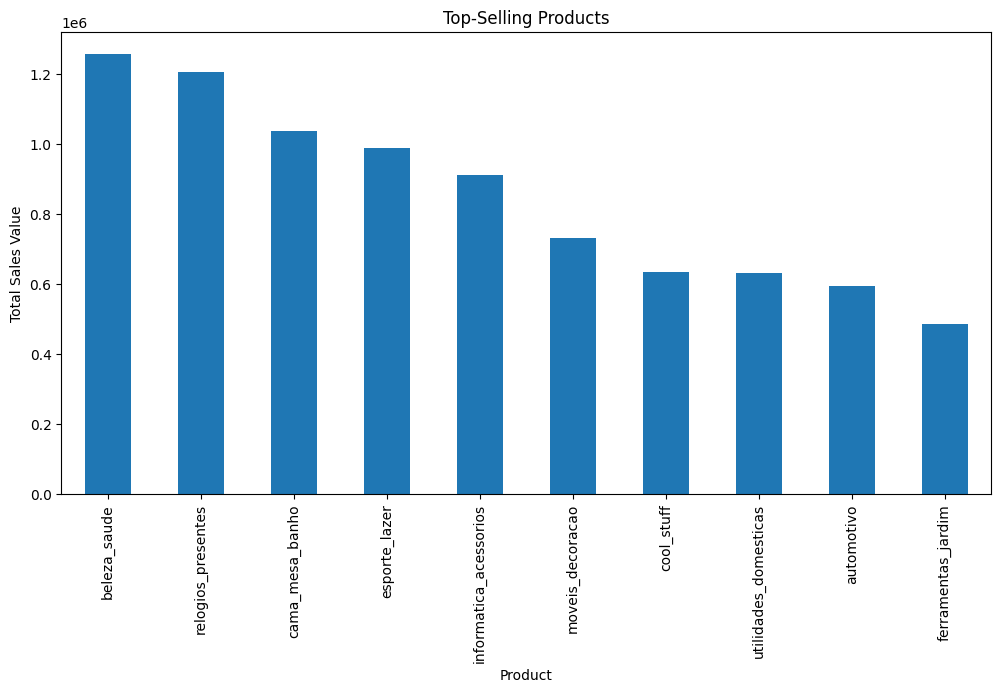

In [13]:
# Plot top-selling products
plt.figure(figsize=(12, 6))
top_selling_products.plot(kind='bar', title='Top-Selling Products')
plt.xlabel('Product')
plt.ylabel('Total Sales Value')
plt.show()